# <center>Data research

In [1]:
import os
workdir = ".."
os.chdir(workdir)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = "data"

In [4]:
train_file = "train.csv"
test_file = "test.csv"

In [5]:
train = pd.read_csv(os.path.join(data_path, train_file), index_col=1, parse_dates=True)

In [6]:
train.head()

,id,target
dt,,
2016-01-02,0,747.8
2016-01-03,0,681.2
2016-01-04,0,505.8
2016-01-06,0,1078.3
2016-01-07,0,961.9


In [7]:
train.shape

(8230, 2)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8230 entries, 2016-01-02 to 2017-06-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8230 non-null   int64  
 1   target  8230 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 192.9 KB


In [9]:
ids = train.id.unique()
ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [10]:
def get_train_id(train, store_id):
    return train[train.id == store_id].drop("id", axis=1)

In [11]:
trains = {store_id: get_train_id(train, store_id) for store_id in ids}

In [12]:
trains[0]

,target
dt,
2016-01-02,747.8
2016-01-03,681.2
2016-01-04,505.8
2016-01-06,1078.3
2016-01-07,961.9
...,...
2017-06-25,613.5
2017-06-26,627.8
2017-06-27,464.5


### Check of gaps

In [13]:
df = pd.DataFrame()
for store_id in trains:
    ind = trains[store_id].index
    full_ind = pd.date_range(ind[0], ind[-1], freq='D')
    df.loc[store_id, "first_date"] = ind[0]
    df.loc[store_id, "last_date"] = ind[-1]
    df.loc[store_id, "len_ind"] = len(ind)
    df.loc[store_id, "len_full_ind"] = len(full_ind)
df.index.name = "store_id"
df

,first_date,last_date,len_ind,len_full_ind
store_id,,,,
0,2016-01-02,2017-06-30,453.0,546.0
1,2016-01-02,2017-06-30,453.0,546.0
2,2016-01-02,2017-06-30,448.0,546.0
3,2016-01-02,2017-06-30,448.0,546.0
4,2016-01-02,2017-06-30,294.0,546.0
5,2016-01-02,2017-06-30,451.0,546.0
6,2016-01-02,2017-06-30,451.0,546.0
7,2016-01-02,2017-06-30,450.0,546.0
8,2016-01-02,2017-06-30,294.0,546.0


### Выводы:    
- начало и конец у всех временных рядов совпадают
- длительность различная и меньше, чем у количество дней между началом и концом ряда
- во всех рядах есть пропуски, и в некоторых рядах их очень много

## О пропусках в данных
Один из вариантов обработки пропусков - это просто их игнорировать (удалить соответтвующие строки). В текущих данных, поскольку это временные ряды, такой вариант может вызвать смещение и искажение дат, периодов в данных и т.д. Такой вариант здесь не подходит.    
### Варианты заполнения
Для заполнения можно использовать следующие варианты:
- заполнение нулями (например, когда пропуски - это просто отсутствие продаж - не было покупателей или просто выходной)
- соседим значением (которое впереди или сзади)
- среднее соседних значений
- среднее по всем данным

Изучим пропуски, чтобы понять, какой метод лучше подойдет.    
В реальной задаче хорошо бы еще пообщаться с собственником данных, но здесь такой возможности, будем считать (задача тестовая) нет

In [15]:
def fill_vacation_by_na(data):
    """
    функция генерирует пропущенные даты и заполняет их NaN
    """
    ind = data.index
    full_ind = pd.date_range(ind[0], ind[-1], freq='D')
    data = pd.DataFrame(data, index=full_ind)
#     data = data.fillna(method="ffill")
    return data

In [16]:
trains_filled = {}
for store_id in trains:
    trains_filled[store_id] = fill_vacation_by_na(trains[store_id])

In [17]:
trains_filled[0][:20]

,target
2016-01-02,747.8
2016-01-03,681.2
2016-01-04,505.8
2016-01-05,NaN
2016-01-06,1078.3
2016-01-07,961.9
2016-01-08,778.5
2016-01-09,805.9
2016-01-10,793.4
2016-01-11,520.7


Посмотрим даты пропусков

In [19]:
ind_with_nan = trains_filled[0].index[trains_filled[0].target.isnull()]
ind_with_nan

DatetimeIndex(['2016-01-05', '2016-01-12', '2016-01-19', '2016-01-26',
               '2016-02-02', '2016-02-09', '2016-02-16', '2016-02-23',
               '2016-02-29', '2016-03-02', '2016-03-09', '2016-03-16',
               '2016-03-23', '2016-03-30', '2016-04-06', '2016-04-13',
               '2016-04-18', '2016-04-20', '2016-04-21', '2016-04-27',
               '2016-05-01', '2016-05-04', '2016-05-11', '2016-05-18',
               '2016-05-25', '2016-05-29', '2016-06-01', '2016-06-08',
               '2016-06-09', '2016-06-15', '2016-06-22', '2016-06-29',
               '2016-07-06', '2016-07-13', '2016-07-20', '2016-07-27',
               '2016-08-03', '2016-08-10', '2016-08-17', '2016-08-24',
               '2016-08-31', '2016-09-07', '2016-09-14', '2016-09-21',
               '2016-09-28', '2016-10-03', '2016-10-05', '2016-10-12',
               '2016-10-19', '2016-10-26', '2016-11-02', '2016-11-09',
               '2016-11-16', '2016-11-23', '2016-11-30', '2016-12-07',
      

Видим, что пропуски во всех просмотренных данных происходят (как правило) на каждый 7 день. То же самое и для других store_id. Логично предположить, что это выходной в магазине.

### По поводу метода заполнения пропусков
Посколку это, скорее всего, выходные, то продажи здесь нулевые. Можно было бы просто тогда заполнить нулями. Но, и это существенно, в этом случае это сильно повлияет на статистики ряда, в первую очередь - на мат. ожидание. Это, в свою очередь, внесет искажение в прогноз. Чтобы убедиться в этом, посмотрим на гистораммы

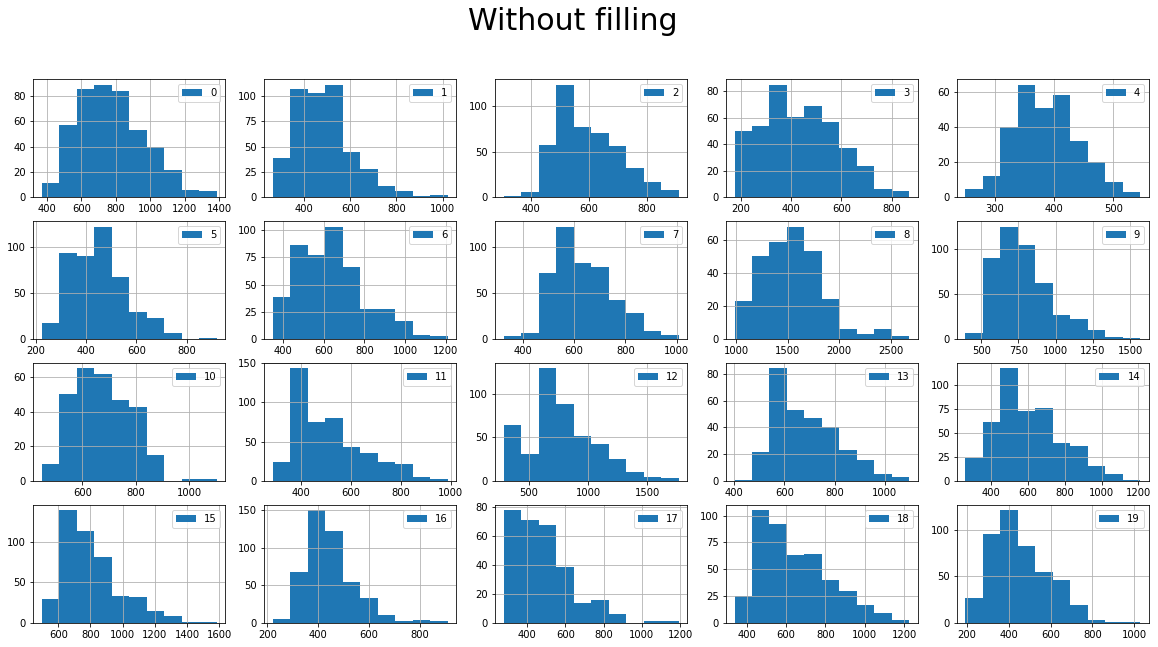

In [42]:
rows = 4
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle("Without filling", fontsize=30)
for num, store_id in enumerate(trains):
    ax = axs[num // cols, num % cols]
    trains[store_id].target.hist(ax=ax, label=store_id)
    ax.legend()

А если заполним нулями, то будет следующее:

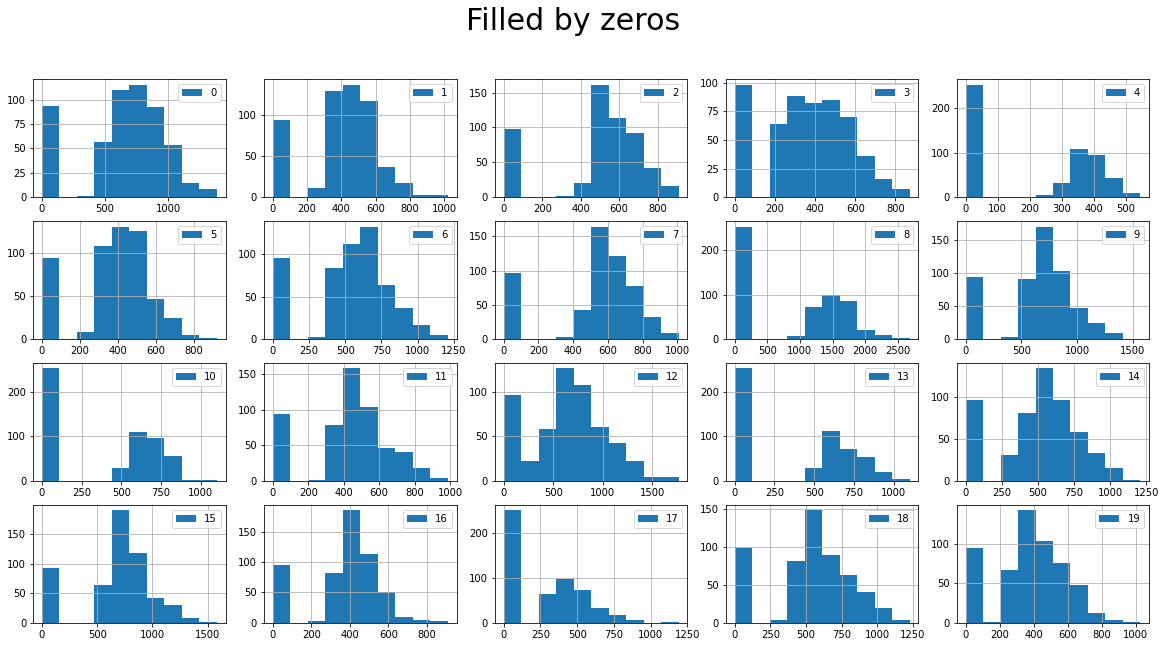

In [43]:
rows = 4
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle("Filled by zeros", fontsize=30)
for num, store_id in enumerate(trains):
    ax = axs[num // cols, num % cols]
    trains_filled[store_id].fillna(0).target.hist(ax=ax, label=store_id)
    ax.legend()

Как и ожидалось, в этом случае имеем всплеск слева (в районе 0), который в данном случае недопустим.    

#### Что далее:
Можем заполнить соседним значением, а можем средним по ряду.    
Я склоняюсь к соседнему значению. Это, с одной стороны, сохранит профиль ряда, с другой стороны - не сильно исказит статистики. Убедимся в этом на гистораммах

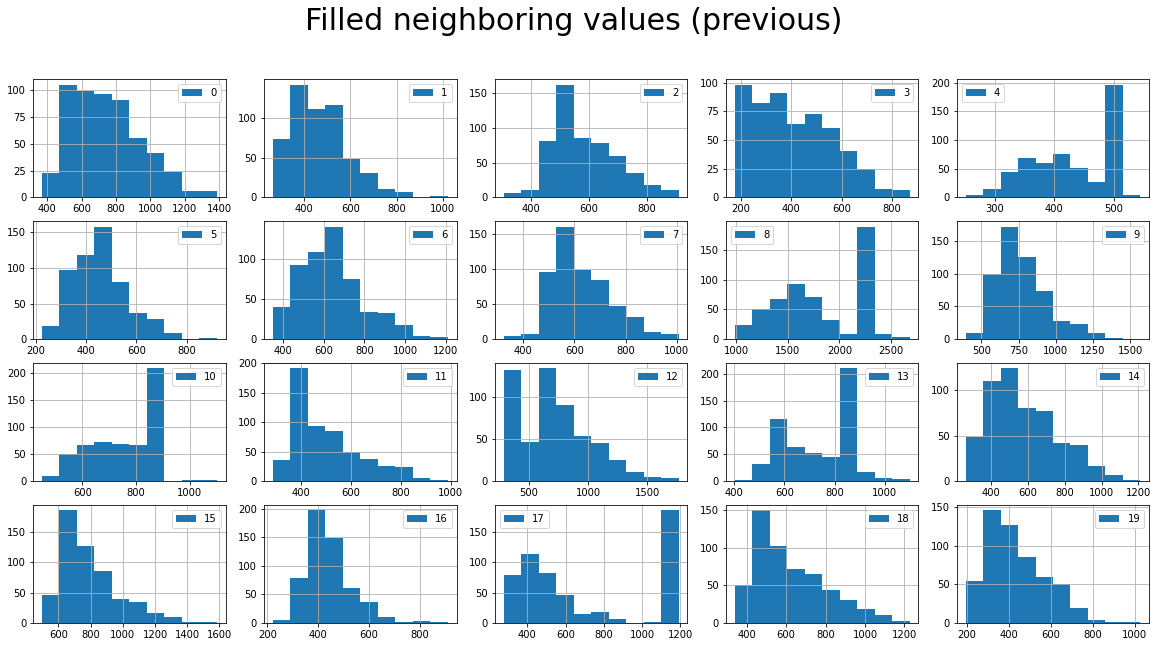

In [44]:
rows = 4
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle("Filled neighboring values (previous)", fontsize=30)
for num, store_id in enumerate(trains):
    ax = axs[num // cols, num % cols]
    trains_filled[store_id].ffill().target.hist(ax=ax, label=store_id)
    ax.legend()

В итоге останавливаемся на заполнении пропусков соседними (предыдущими) значениями.    
### NOTE 1: 
Впоследствие, при прогнозировании, нужно будет учесть график работы магазинов и обнулить объем продаж в дни, когда у магазина выходной (это, как правило, не в уикэнд)

### NOTE 2:
Появились аномальные выбросы на гистограммах для store_id =  (4, 8, 10, 13, 17). Как будет видно ниже, это связано с отсутствием 6-ти месячных данных в этих рядах. Это нужно будет обрабатывать отдельно.

### Итак, заполним пропуски соседним значением 

In [45]:
for store_id in trains:
    trains_filled[store_id] = trains_filled[store_id].fillna(method="ffill")

## Посмотрим визуально, что получилось

### 1) All on one chart

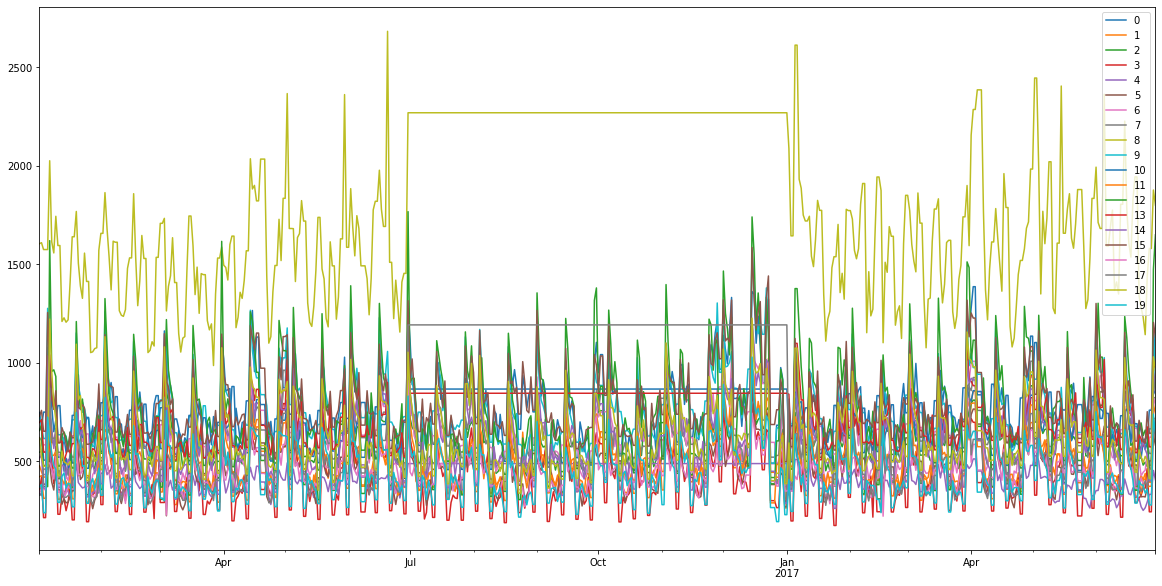

In [47]:
for store_id in ids:
    trains_filled[store_id].target.plot(figsize=(20, 10), label=str(store_id))
    plt.legend();

### 2) Different charts

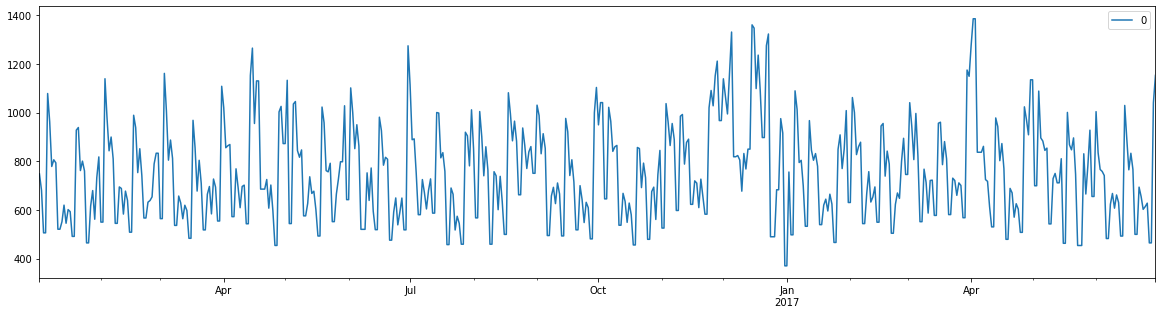

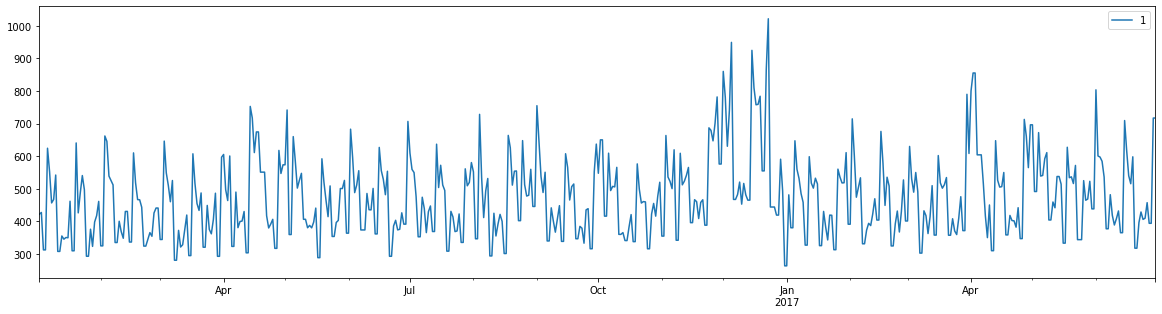

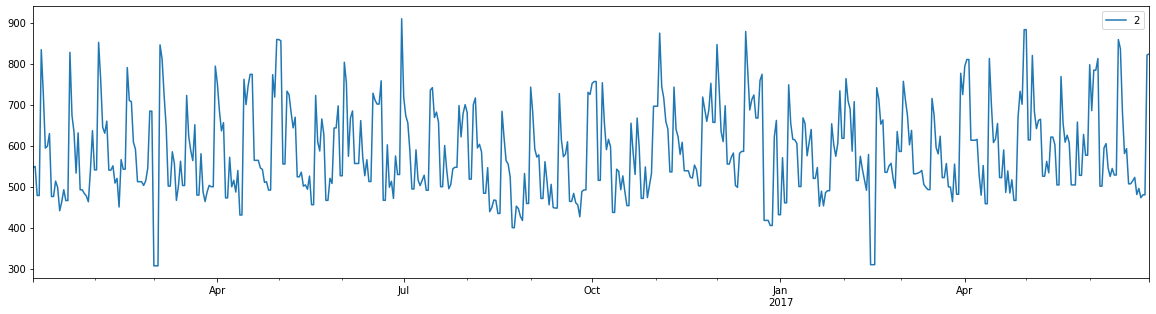

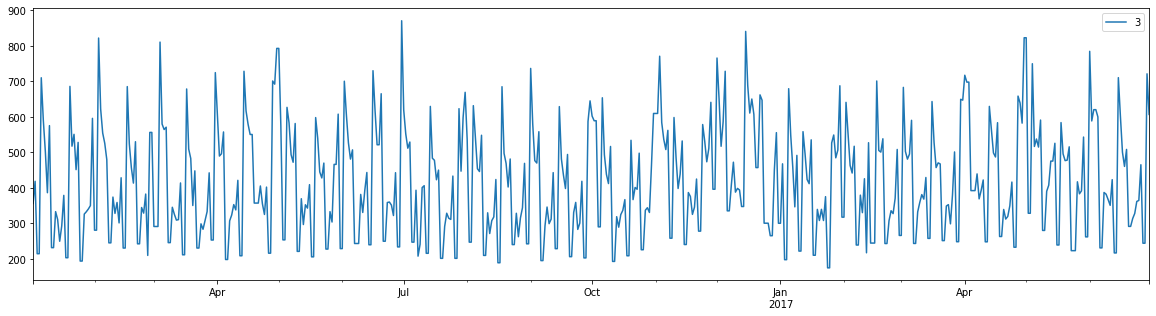

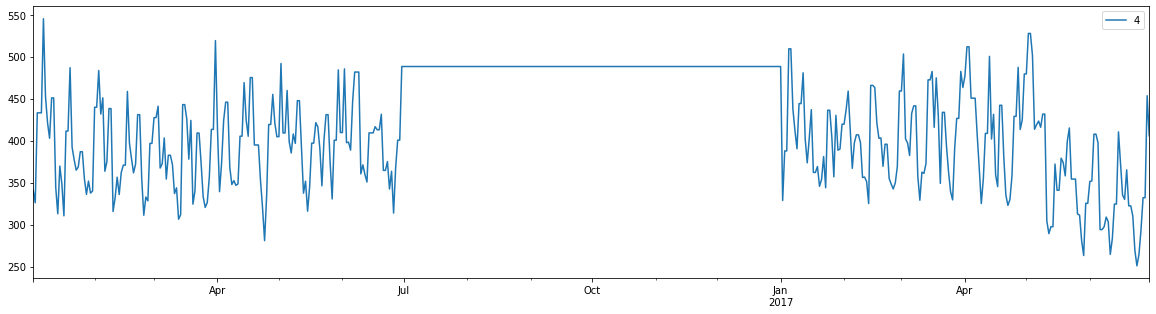

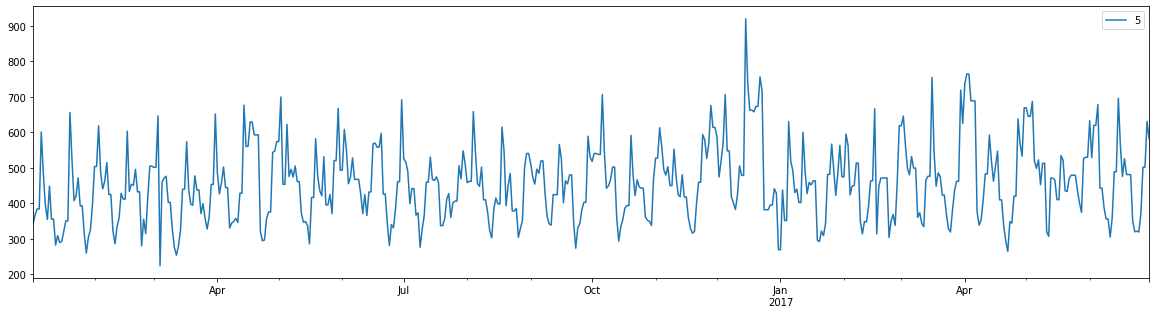

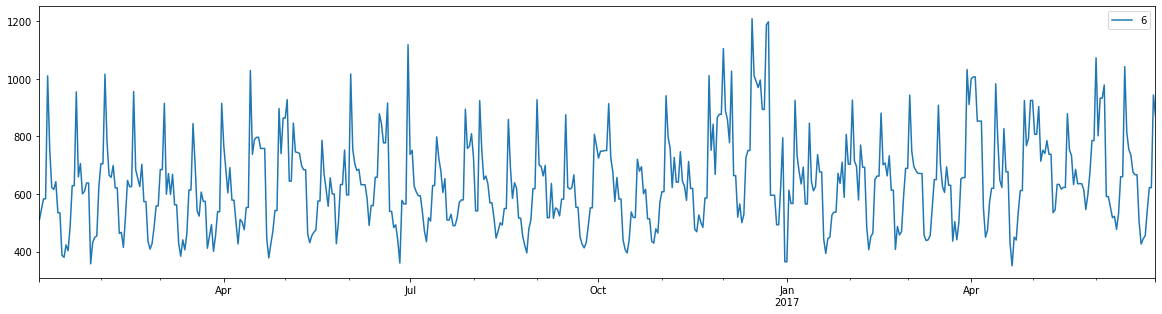

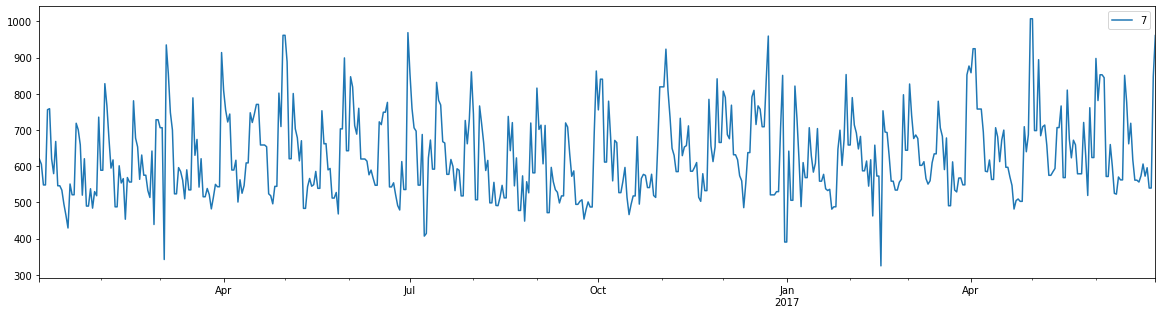

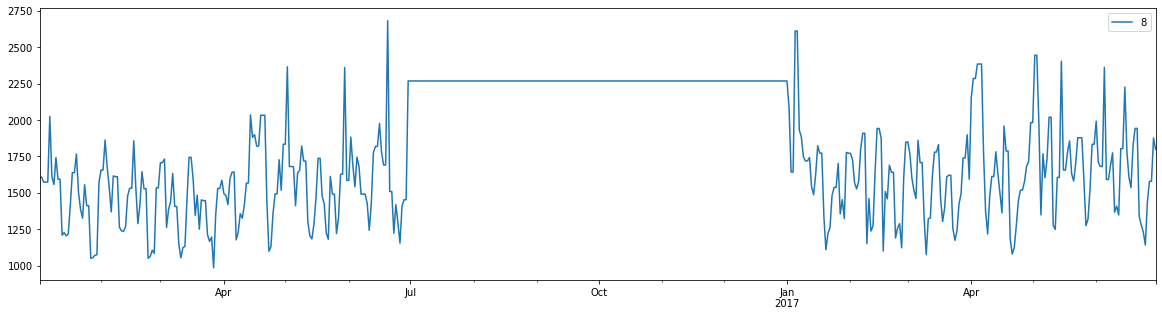

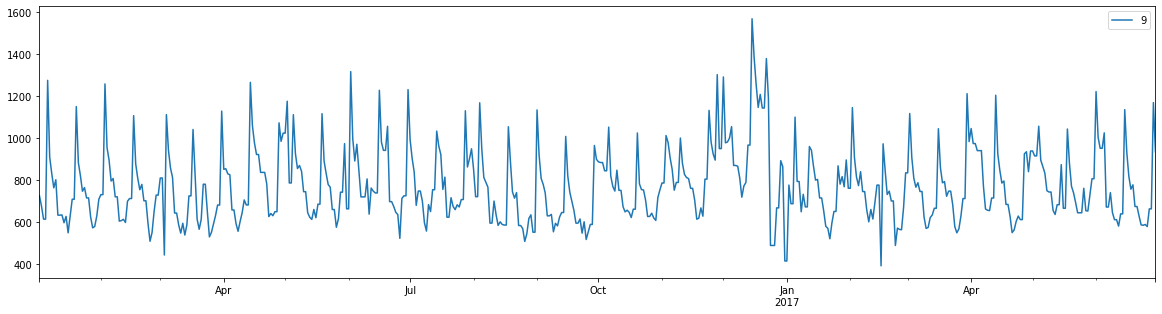

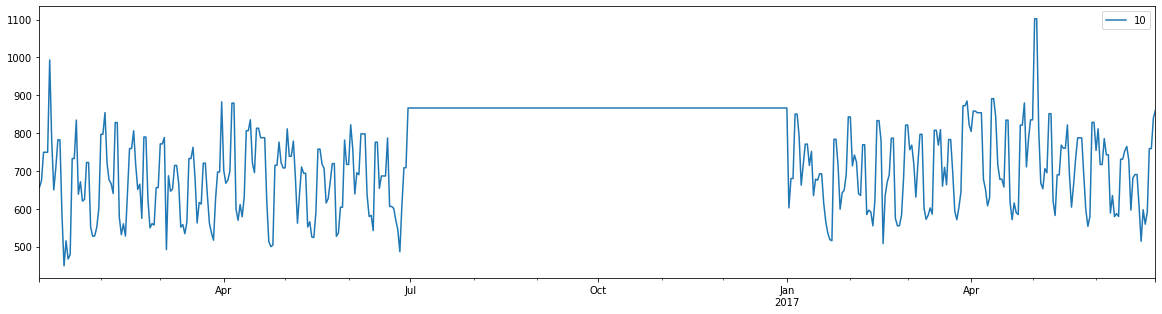

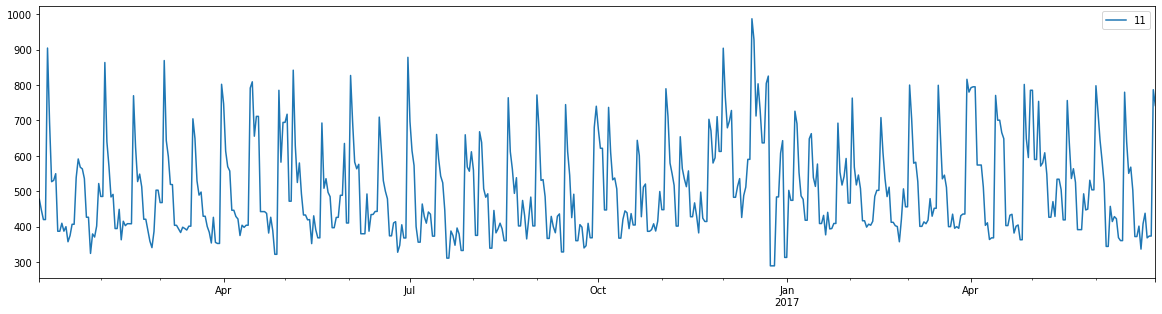

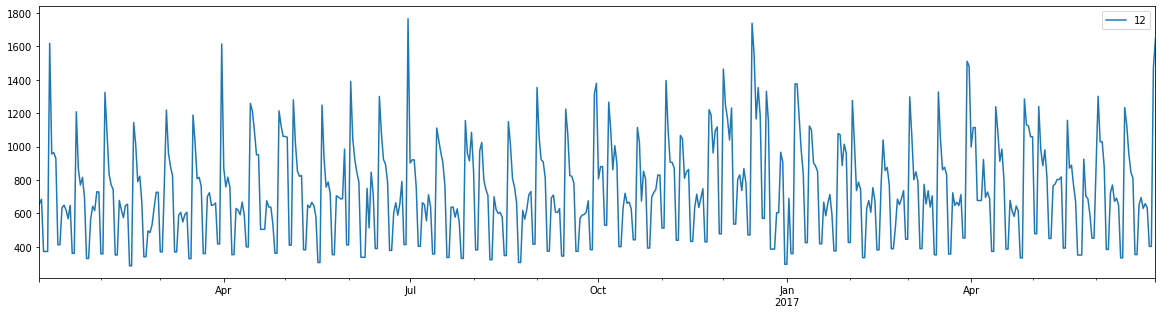

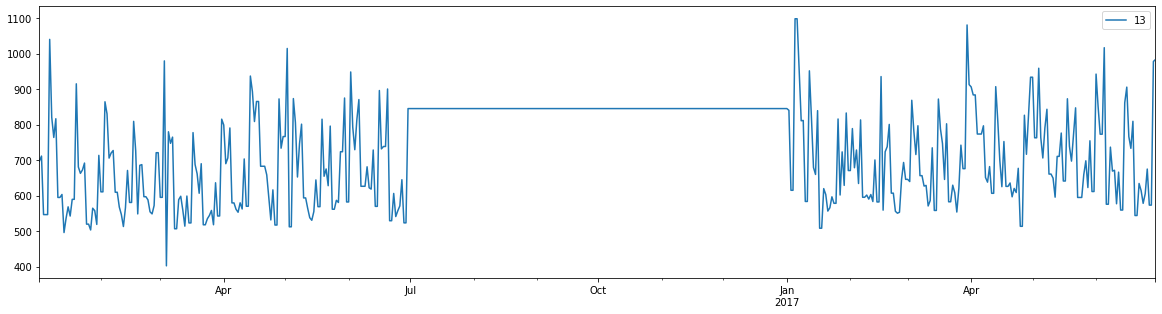

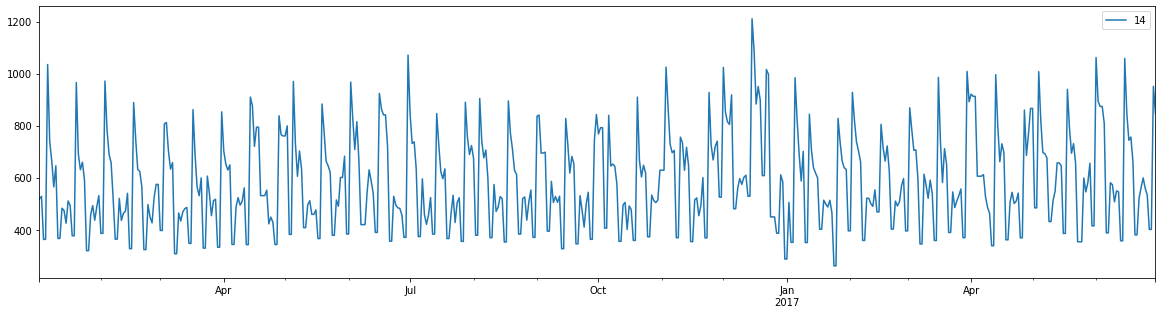

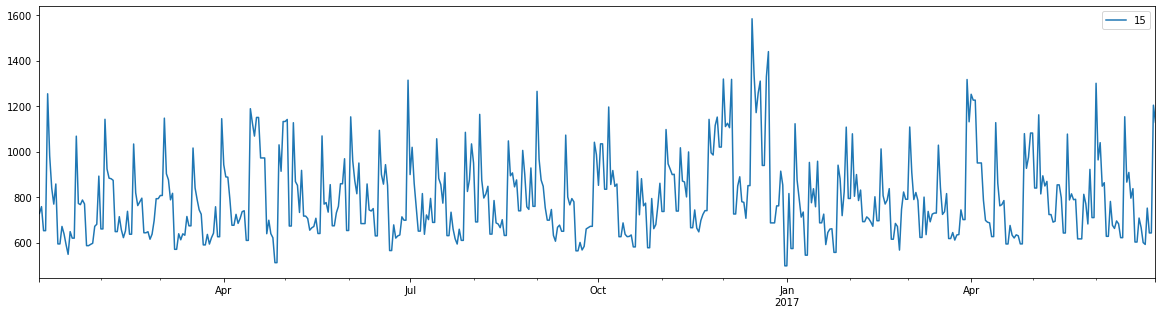

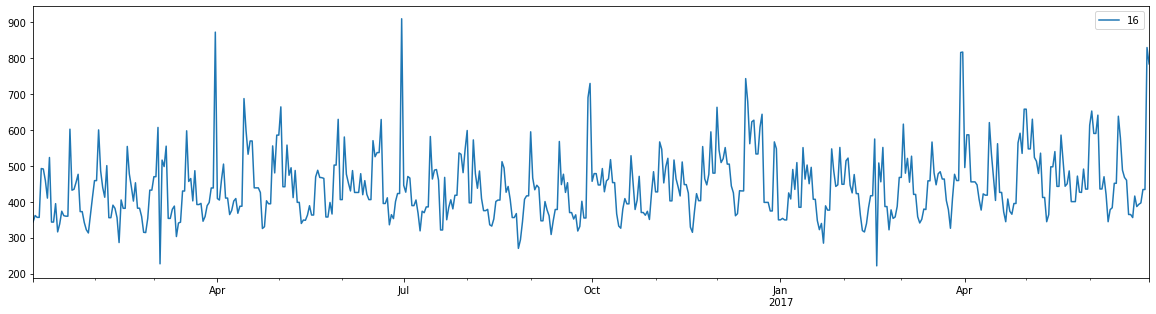

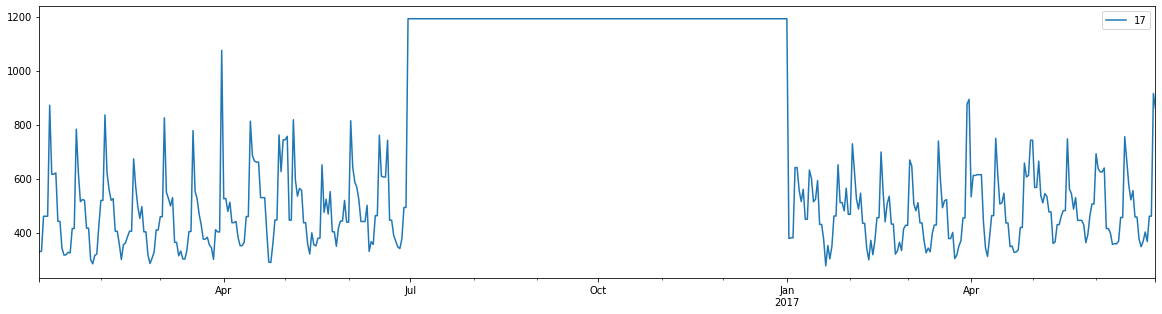

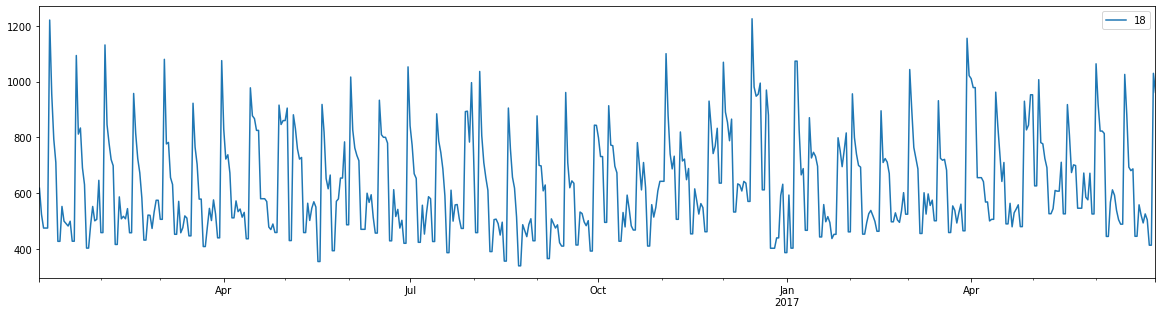

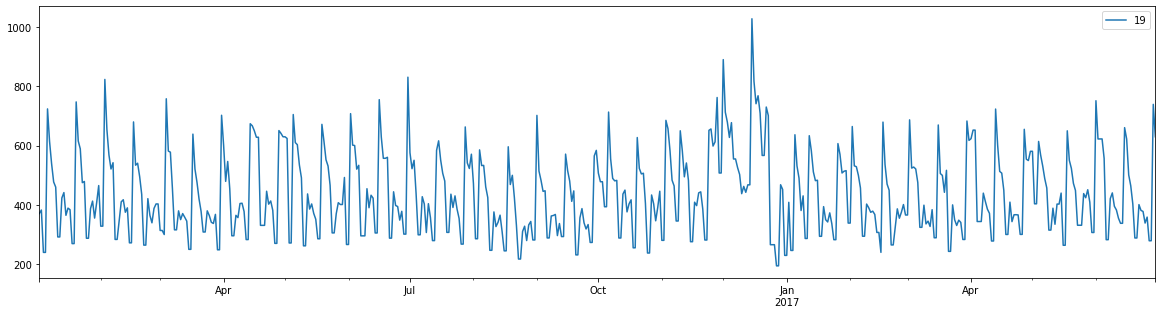

In [48]:
for store_id in ids:
    trains_filled[store_id].target.plot(figsize=(20, 5), label=str(store_id))
    plt.legend()
    plt.show()

### 3) Last 60 days each

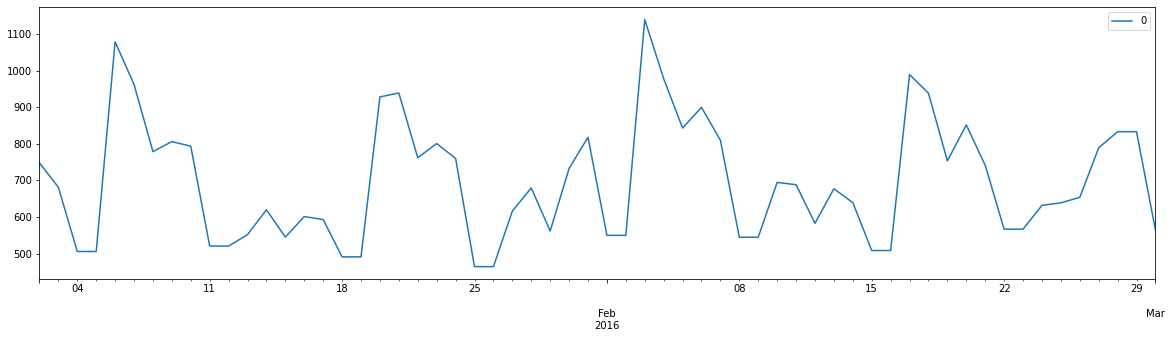

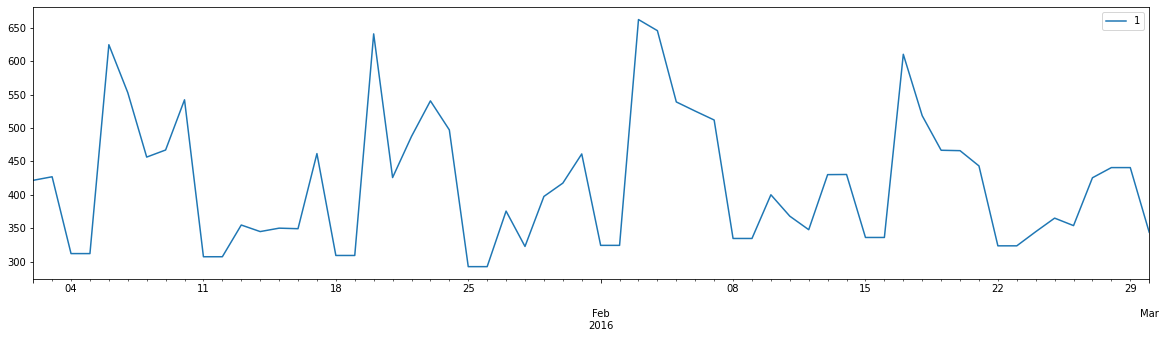

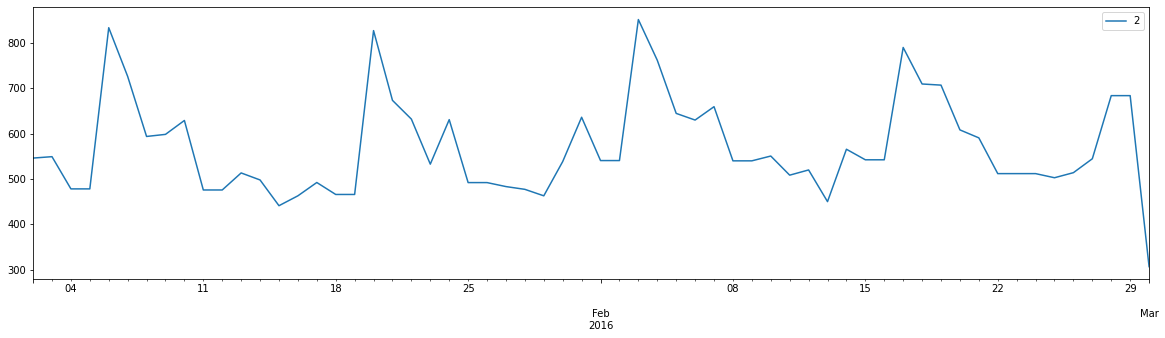

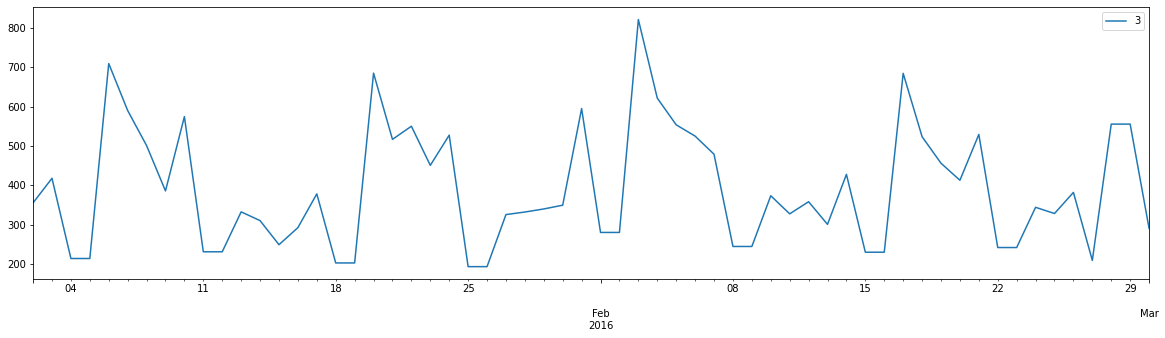

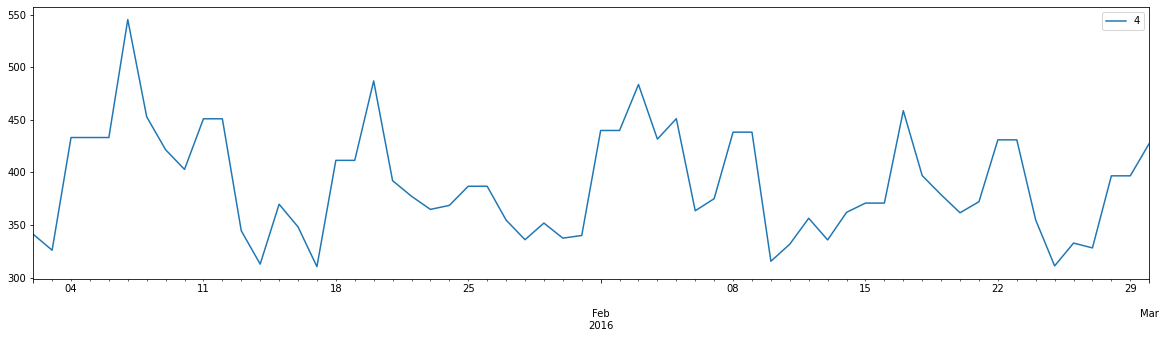

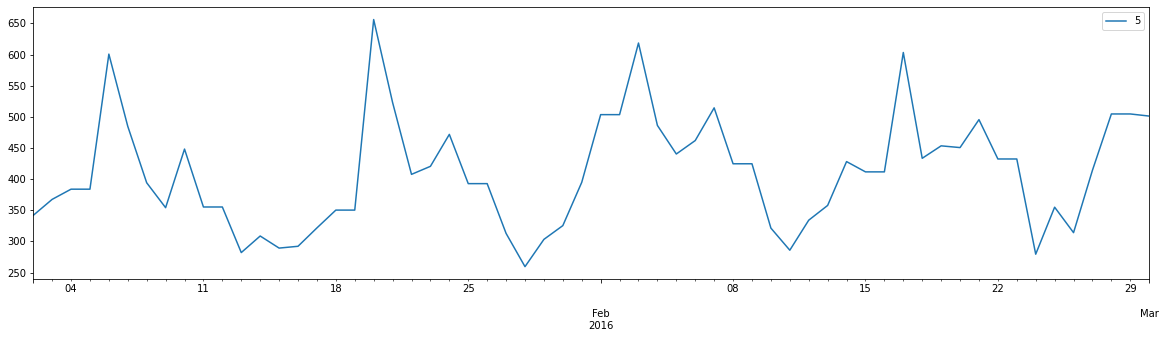

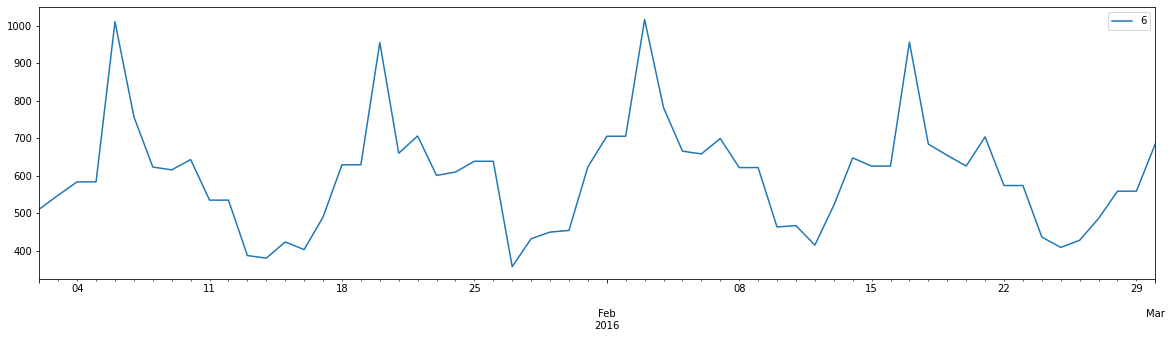

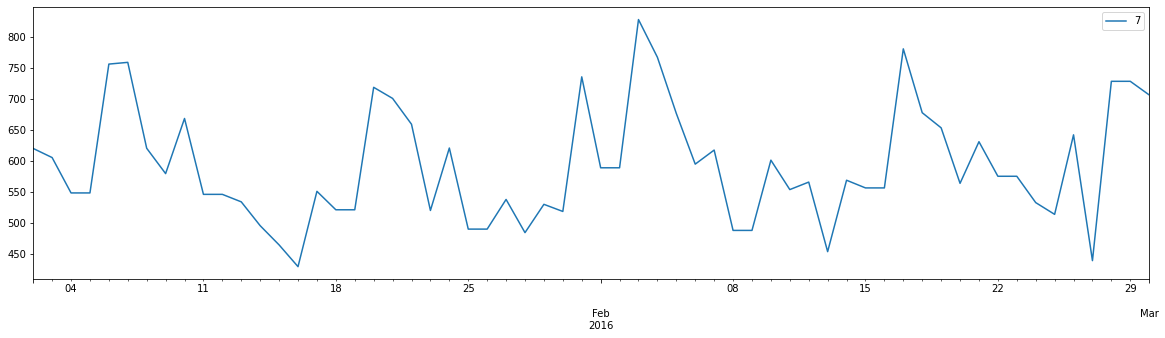

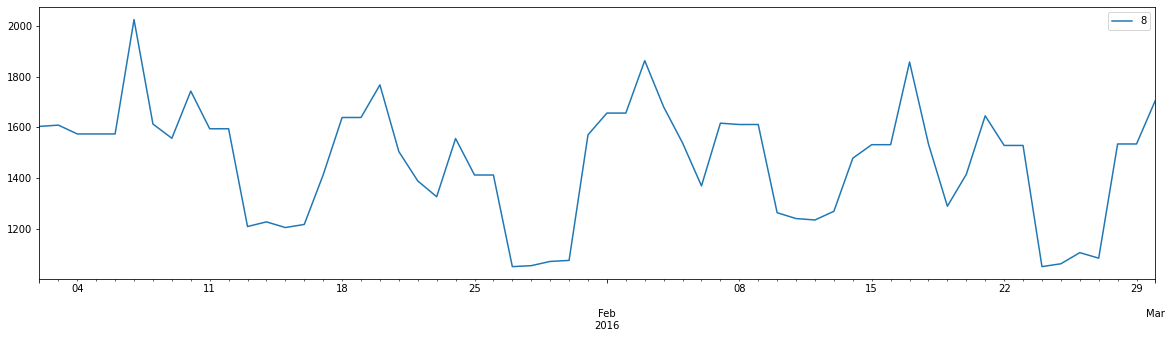

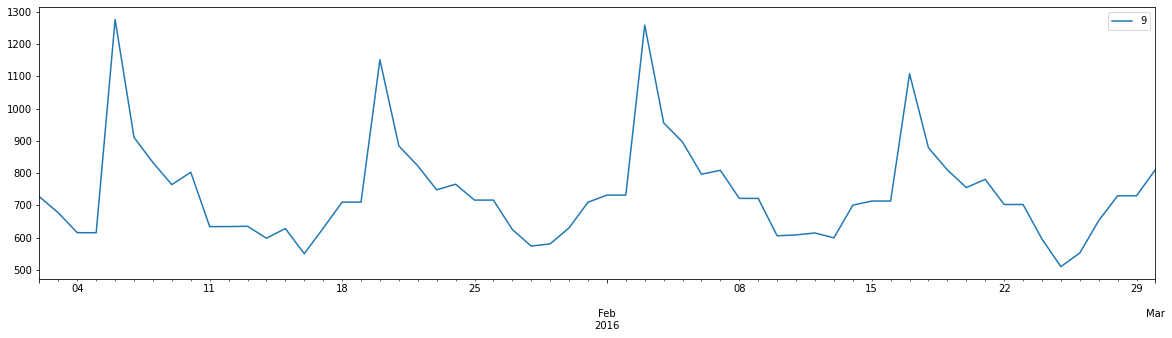

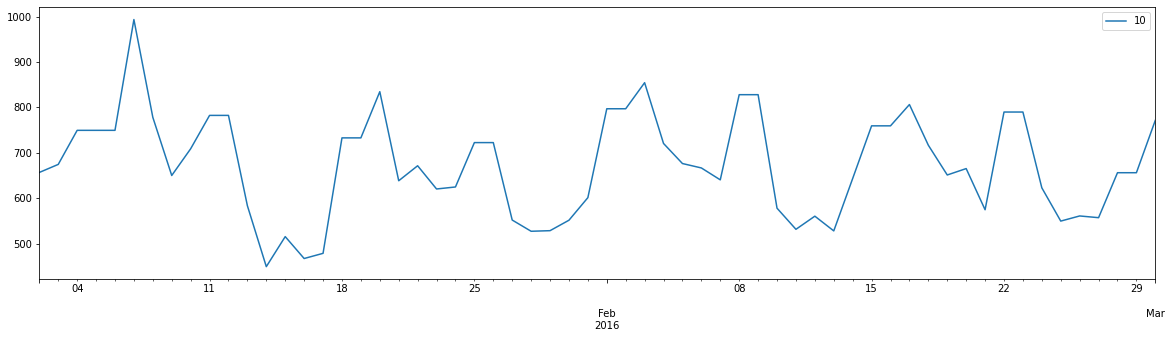

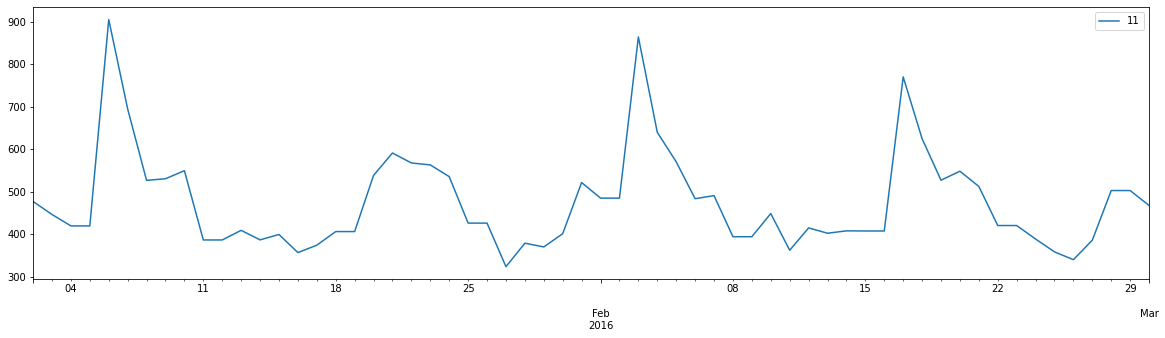

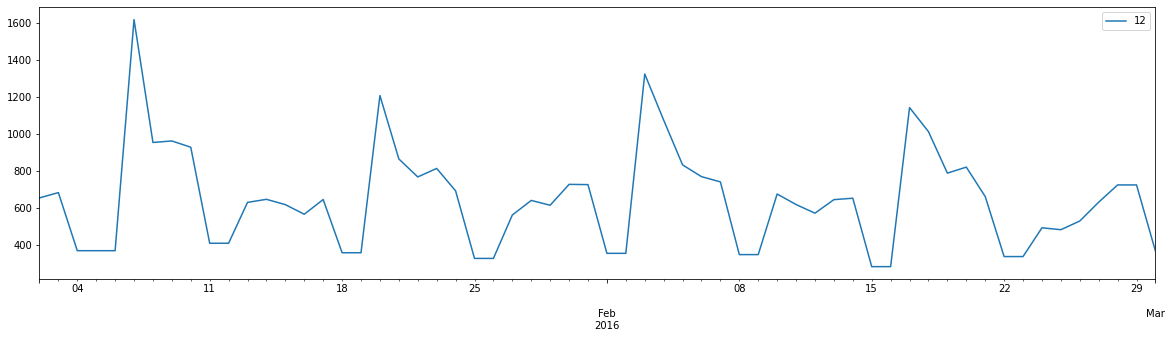

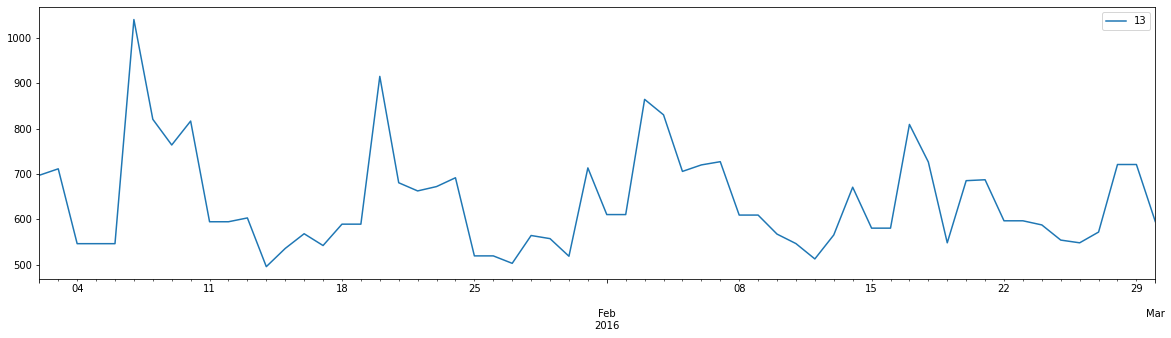

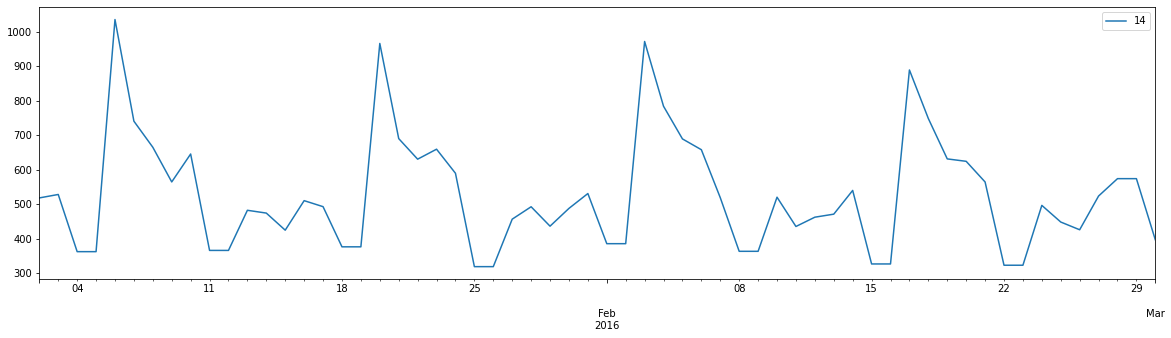

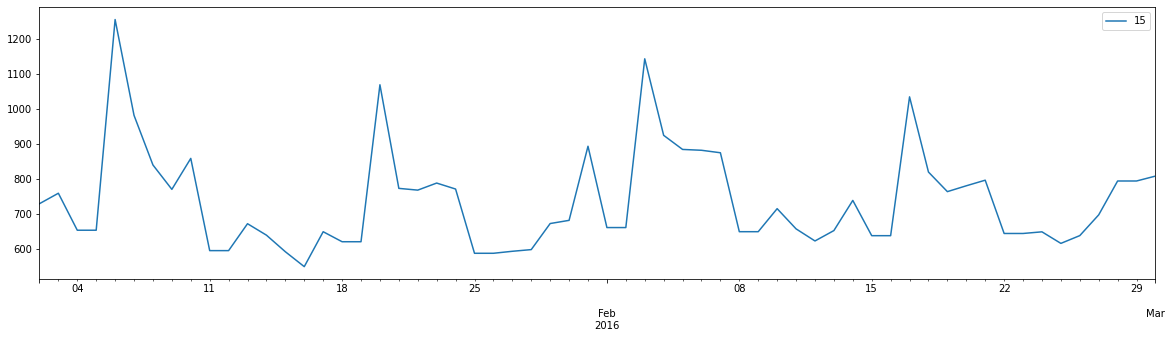

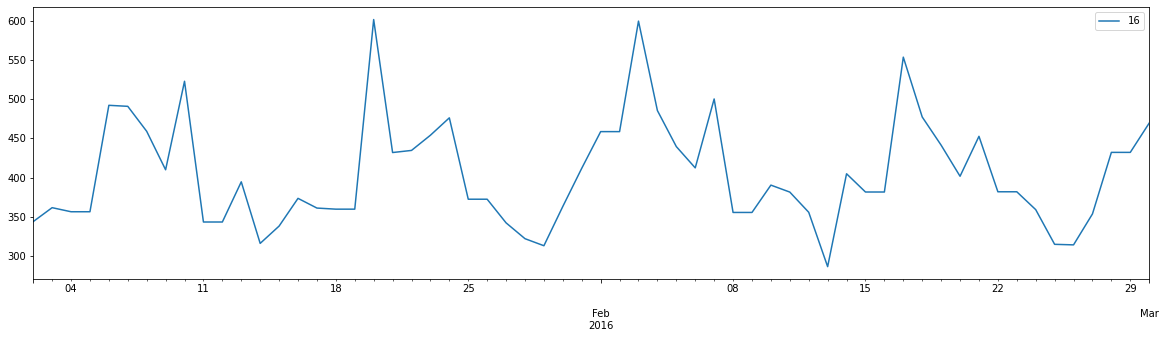

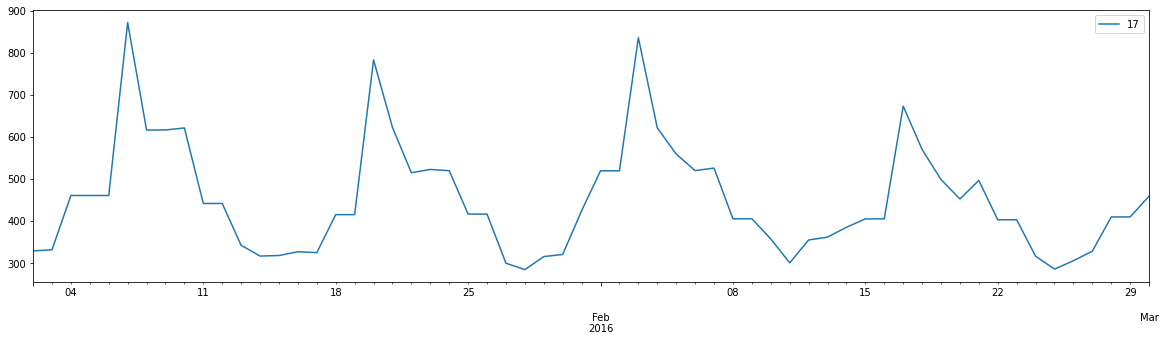

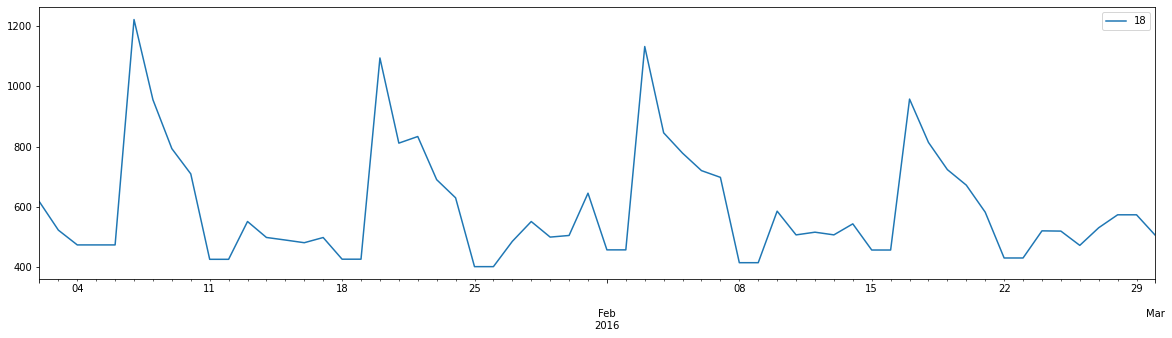

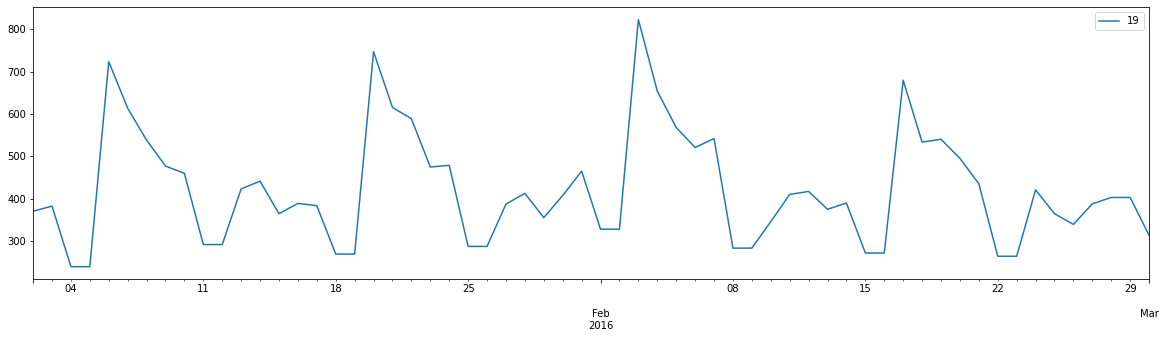

In [49]:
for store_id in ids:
    trains_filled[store_id].target[:60].plot(figsize=(20, 5), label=str(store_id))
    plt.legend()
    plt.show()

## Preliminary analysis
- данные - временные ряды
- имеется 20 рядов
- начальные и конечные даты совпадают, имеются пропуски
- распределения продаж визуально близко (не совсем, конечно, но с определенной степенью приближения (!)) к гауссовому или может быть сведено к гауссову путем некоторых преобразований. Это нужно будет для эффективного прогнозирования
- заполнение пропусков соседним (предыдущим) значением выглядит вполне адекватно и не искажает профиль ряда
- в данных имеется выраженная сезонность с периодами около 2-х недель
- в магазинах с id 4, 8, 10, 13, 17 имеются 7-ми месячные пропуски в середине временного ряда
- визуально ряды близки к стационарным

## Summary:   
- такие ряды достаточно неплохо прогнозируются моделями семейства ARIMA (SARIMA) с соответствующим подбором гиперпараметров
- надо подумать над вариант обработки ситуации в рядах с отсутствием 7-ми месячных данных (как вариант - просто выкинуть эти 6 месяцев (с сохранением дней недели) с последующим переназначением дат, чтобы сохранить непрерывность)